In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.0000, high=90.0000, size=1500)
lngs = np.random.uniform(low=-180.0000, high=180.0000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Import the citipy module
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

621

# Import Dependencies, and Initialize an Empty List and Counters

In [7]:
# Import Requests Library and the weather_api_key.
import requests
# Import the API key
from config import weather_api_key

# Build basic URL + API key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eba3522468d0a8ca6a2240c33ed79c78"

# Import the datetime module from the datetime library.
from datetime import datetime


In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1


# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hobart
Processing Record 2 of Set 1 | novichikha
Processing Record 3 of Set 1 | saint anthony
Processing Record 4 of Set 1 | vao
Processing Record 5 of Set 1 | honningsvag
Processing Record 6 of Set 1 | chisinau
Processing Record 7 of Set 1 | kapaa
Processing Record 8 of Set 1 | vaini
Processing Record 9 of Set 1 | vanimo
Processing Record 10 of Set 1 | lumberton
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | mahebourg
Processing Record 13 of Set 1 | ancud
Processing Record 14 of Set 1 | san patricio
Processing Record 15 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 16 of Set 1 | pran buri
Processing Record 17 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 18 of Set 1 | bozoum
Processing Record 19 of Set 1 | blairmore
Processing Record 20 of Set 1 | caravelas
Processing Record 21 of Set 1 | lompoc
Processing Record 22 of Set 1 |

Processing Record 39 of Set 4 | dekar
Processing Record 40 of Set 4 | butaritari
Processing Record 41 of Set 4 | zaoyang
Processing Record 42 of Set 4 | wangaratta
Processing Record 43 of Set 4 | talcahuano
Processing Record 44 of Set 4 | ondorhaan
City not found. Skipping...
Processing Record 45 of Set 4 | zinder
Processing Record 46 of Set 4 | saint-joseph
Processing Record 47 of Set 4 | lichtenburg
Processing Record 48 of Set 4 | berlevag
Processing Record 49 of Set 4 | naze
Processing Record 50 of Set 4 | capoterra
Processing Record 1 of Set 5 | nizhnevartovsk
Processing Record 2 of Set 5 | kahului
Processing Record 3 of Set 5 | cherskiy
Processing Record 4 of Set 5 | talavera de la reina
Processing Record 5 of Set 5 | tuktoyaktuk
Processing Record 6 of Set 5 | barentsburg
City not found. Skipping...
Processing Record 7 of Set 5 | tromso
Processing Record 8 of Set 5 | arlit
Processing Record 9 of Set 5 | aykhal
Processing Record 10 of Set 5 | tabou
Processing Record 11 of Set 5 | l

Processing Record 28 of Set 8 | puerto rico
Processing Record 29 of Set 8 | praia da vitoria
Processing Record 30 of Set 8 | barcelos
Processing Record 31 of Set 8 | sentyabrskiy
City not found. Skipping...
Processing Record 32 of Set 8 | porbandar
Processing Record 33 of Set 8 | ende
Processing Record 34 of Set 8 | kaeo
Processing Record 35 of Set 8 | nome
Processing Record 36 of Set 8 | ati
Processing Record 37 of Set 8 | beringovskiy
Processing Record 38 of Set 8 | port hedland
Processing Record 39 of Set 8 | calpulalpan
Processing Record 40 of Set 8 | grand gaube
Processing Record 41 of Set 8 | inzer
Processing Record 42 of Set 8 | kamenskoye
City not found. Skipping...
Processing Record 43 of Set 8 | nara
Processing Record 44 of Set 8 | nokaneng
Processing Record 45 of Set 8 | sakata
Processing Record 46 of Set 8 | nelson bay
Processing Record 47 of Set 8 | north bend
Processing Record 48 of Set 8 | tigil
Processing Record 49 of Set 8 | jipapad
Processing Record 50 of Set 8 | punt

City not found. Skipping...
Processing Record 13 of Set 12 | kiama
Processing Record 14 of Set 12 | pasni
Processing Record 15 of Set 12 | krasnoselkup
Processing Record 16 of Set 12 | ribeirao
Processing Record 17 of Set 12 | lolua
City not found. Skipping...
Processing Record 18 of Set 12 | ravar
Processing Record 19 of Set 12 | ayagoz
Processing Record 20 of Set 12 | malanje
Processing Record 21 of Set 12 | katsuura
Processing Record 22 of Set 12 | samusu
City not found. Skipping...
Processing Record 23 of Set 12 | churapcha
Processing Record 24 of Set 12 | arona
Processing Record 25 of Set 12 | dingle
Processing Record 26 of Set 12 | alta floresta
Processing Record 27 of Set 12 | askiz
Processing Record 28 of Set 12 | kaniama
Processing Record 29 of Set 12 | longonjo
Processing Record 30 of Set 12 | tommot
Processing Record 31 of Set 12 | juneau
Processing Record 32 of Set 12 | chitrakonda
Processing Record 33 of Set 12 | srednekolymsk
Processing Record 34 of Set 12 | dukat
Process

In [9]:
len(city_data)

569

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hobart,-42.88,147.33,55.99,47,75,24.16,AU,2020-08-28 00:13:52
1,Novichikha,52.20,81.39,54.25,93,60,5.01,RU,2020-08-28 00:14:15
2,Saint Anthony,45.02,-93.22,86.00,48,1,8.05,US,2020-08-28 00:13:47
3,Vao,-22.67,167.48,67.71,74,90,18.52,NC,2020-08-28 00:14:15
4,Honningsvag,70.98,25.97,45.79,69,99,24.85,NO,2020-08-28 00:14:15
5,Chisinau,47.01,28.86,62.60,67,93,1.12,MD,2020-08-28 00:13:11
6,Kapaa,22.08,-159.32,87.01,58,20,11.41,US,2020-08-28 00:14:15
7,Vaini,-21.20,-175.20,80.60,69,40,8.05,TO,2020-08-28 00:14:15
8,Vanimo,-2.67,141.30,82.81,77,26,6.67,PG,2020-08-28 00:14:16
9,Lumberton,34.62,-79.01,91.40,74,40,5.82,US,2020-08-28 00:13:46


In [11]:
# Reorder Columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_datanew_df = city_data_df[new_column_order]

In [12]:
city_datanew_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hobart,AU,2020-08-28 00:13:52,-42.88,147.33,55.99,47,75,24.16
1,Novichikha,RU,2020-08-28 00:14:15,52.20,81.39,54.25,93,60,5.01
2,Saint Anthony,US,2020-08-28 00:13:47,45.02,-93.22,86.00,48,1,8.05
3,Vao,NC,2020-08-28 00:14:15,-22.67,167.48,67.71,74,90,18.52
4,Honningsvag,NO,2020-08-28 00:14:15,70.98,25.97,45.79,69,99,24.85
5,Chisinau,MD,2020-08-28 00:13:11,47.01,28.86,62.60,67,93,1.12
6,Kapaa,US,2020-08-28 00:14:15,22.08,-159.32,87.01,58,20,11.41
7,Vaini,TO,2020-08-28 00:14:15,-21.20,-175.20,80.60,69,40,8.05
8,Vanimo,PG,2020-08-28 00:14:16,-2.67,141.30,82.81,77,26,6.67
9,Lumberton,US,2020-08-28 00:13:46,34.62,-79.01,91.40,74,40,5.82


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

#Export the City_Data into a CSV
city_datanew_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [15]:
# Import the time module
import time
# Get today's date in seconds
today = time.time()
today = time.strftime("%x")
today

'08/27/20'

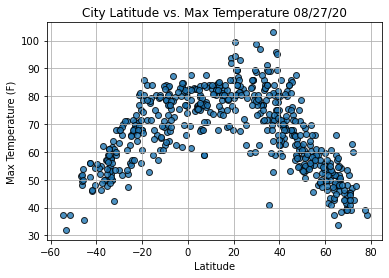

In [16]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

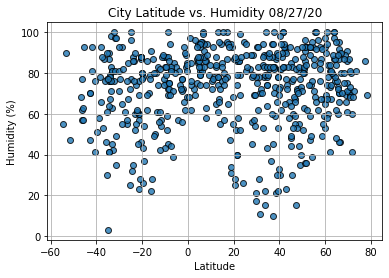

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

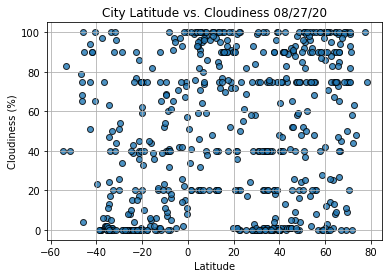

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

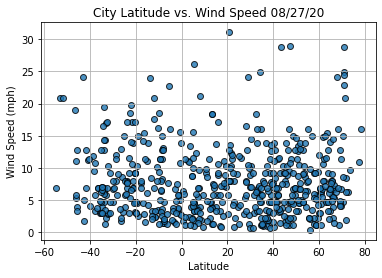

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [21]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plit the regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values,"r")
    # Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitud')
    plt.ylabel(y_label)
    plt.show()
    

In [22]:
index13 = city_data_df.loc[13]
index13

City                 San Patricio
Lat                         19.22
Lng                        -104.7
Max Temp                    76.35
Humidity                       93
Cloudiness                    100
Wind Speed                      7
Country                        MX
Date          2020-08-28 00:14:16
Name: 13, dtype: object

In [23]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Novichikha,52.20,81.39,54.25,93,60,5.01,RU,2020-08-28 00:14:15
2,Saint Anthony,45.02,-93.22,86.00,48,1,8.05,US,2020-08-28 00:13:47
4,Honningsvag,70.98,25.97,45.79,69,99,24.85,NO,2020-08-28 00:14:15
5,Chisinau,47.01,28.86,62.60,67,93,1.12,MD,2020-08-28 00:13:11
6,Kapaa,22.08,-159.32,87.01,58,20,11.41,US,2020-08-28 00:14:15


In [24]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

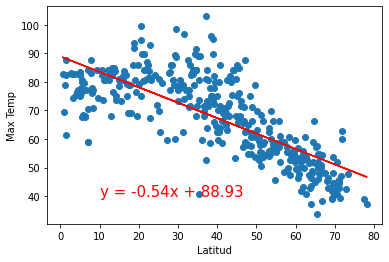

In [72]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hemisphere \
                       for Maximum Temperature', 'Max Temp',(10,40))


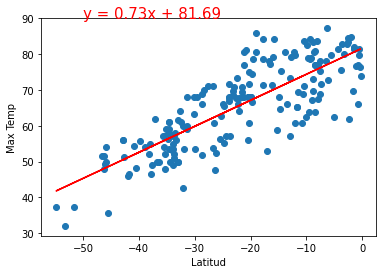

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

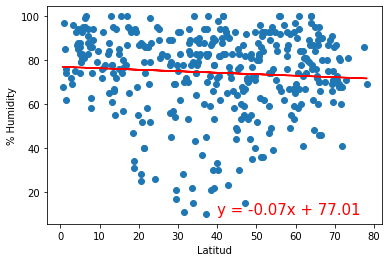

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

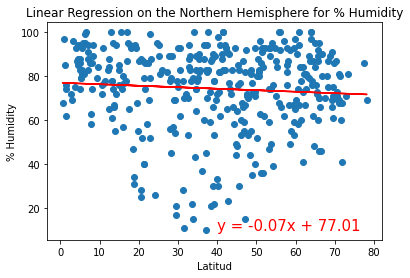

In [69]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plt.title(f"Linear Regression on the Northern Hemisphere \
for % Humidity") 

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

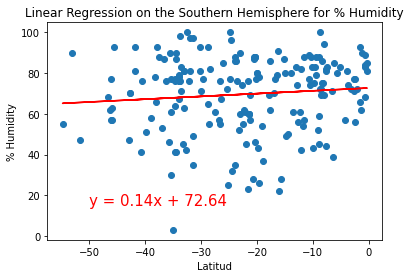

In [67]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plt.title(f"Linear Regression on the Southern Hemisphere \
for % Humidity") 

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

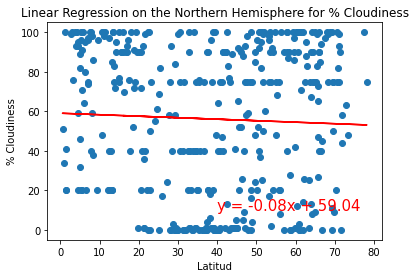

In [65]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plt.title(f"Linear Regression on the Northern Hemisphere \
for % Cloudiness") 
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

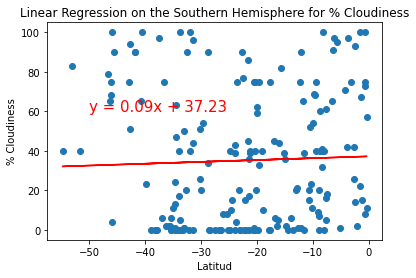

In [63]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plt.title(f"Linear Regression on the Southern Hemisphere \
for % Cloudiness") 
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))